In [9]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib


In [2]:
prices = []

def run_websocket():
    global prices
    def on_message(ws, message):
        global prices
        message_ = json.loads(message)
        prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [3]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [30]:
len(prices)

9184

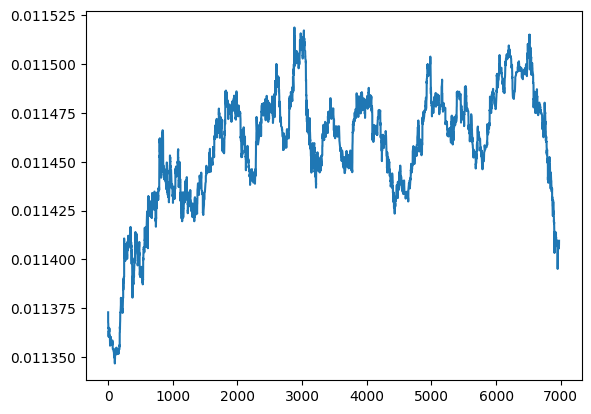

In [79]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - 1719065528570.0)* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [85]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - 1719065528570.0)* 10**(-3) for x in prices]


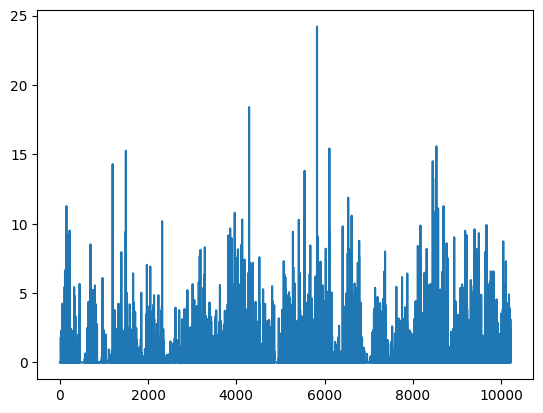

In [46]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.000e+01, 3.000e+00,
        9.000e+00, 6.000e+00, 2.100e+01, 9.000e+00, 2.100e+01, 2.300e+01,
        1.400e+01, 3.100e+01, 2.300e+01, 4.200e+01, 4.000e+01, 4.400e+01,
        9.000e+01, 6.300e+01, 1.630e+02, 1.000e+02, 2.140e+02, 1.790e+02,
        3.880e+02, 6.400e+02, 6.280e+02, 1.992e+03, 1.748e+03, 1.076e+03,
        2.870e+02, 4.010e+02, 3.020e+02, 1.110e+02, 1.950e+02, 1.010e+02,
        1.200e+02, 3.100e+01, 7.200e+01, 6.600e+01, 3.200e+01, 3.200e+01,
        1.300e+01, 2.300e+01, 1.100e+01, 2.400e+01, 1.300e+01, 3.000e+00,
        1.300e+01, 4.000e+00, 8.000e+00, 8.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 1.000e+0

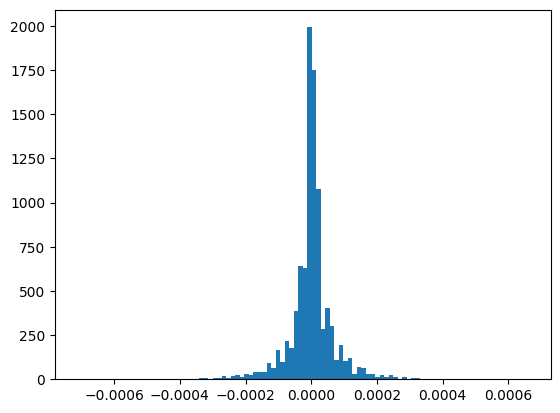

In [41]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [81]:
data = [[(float(x['t']) - 1719065528570.0)* 10**(-3) , float(x['p'])]for x in prices]

In [82]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.001:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([452., 336., 582., 585., 620., 754., 554., 525., 453., 436., 472.,
        439., 436., 350., 379., 310., 393., 512., 389., 319., 323., 292.,
        261., 211., 207., 185., 236., 218., 192., 174., 224., 158., 172.,
        157.,  97., 114.,  87., 117.,  68.,  76.,  84., 112.,  89.,  59.,
         66.,  42.,  49.,  51.,  43.,  24., 118.,  39.,  67.,  32.,  29.,
         16.,  15.,  45.,  95.,  55.,  43.,  40.,  19.,  14.,  11.,  11.,
         11.,  13.,  17.,   9.,  16.,  16.,  30.,  23.,  28.,  16.,  15.,
         17.,  10.,  44.,   7.,   2.,  11.,  18.,   1.,   0.,   4.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([ -1.     ,   1.97186,   4.94372,   7.91558,  10.88744,  13.8593 ,
         16.83116,  19.80302,  22.77488,  25.74674,  28.7186 ,  31.69046,
         34.66232,  37.63418,  40.60604,  43.5779 ,  46.54976,  49.52162,
         52.49348,  55.46534,  58.4372 ,  61.40906,  64.38092,  67.35278,
         70.32464,  73

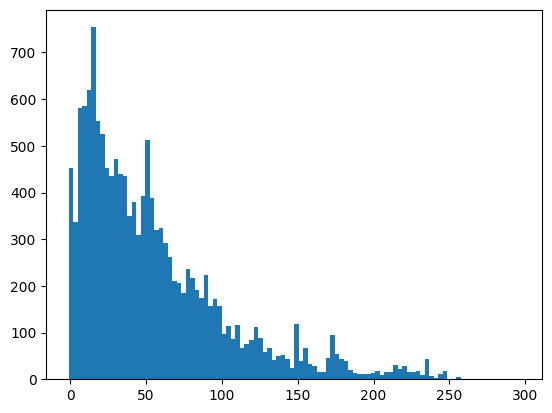

In [83]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,2]], bins=100)

In [87]:
price_list = prices_list

In [90]:
result = []
# 遍历每个价格
for i in range(len(price_list)):
    start_price = price_list[i]
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    
    # 遍历后续价格
    for j in range(i + 1, len(price_list)):
        current_price = price_list[j]
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            total_percentage_change = (current_price - start_price) / start_price * 100
        else:
            break
    
    result.append([start_price, step_count, total_percentage_change])



In [103]:
np.mean(np.array(result)[:, 2])

0.0012551857179904876

(array([2.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        6.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 6.0000e+00, 7.0000e+00, 2.0000e+00, 9.0000e+00,
        1.7000e+01, 1.5600e+02, 1.3260e+03, 1.0452e+04, 2.6600e+03,
        3.5300e+02, 5.0000e+01, 1.1000e+01, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.00

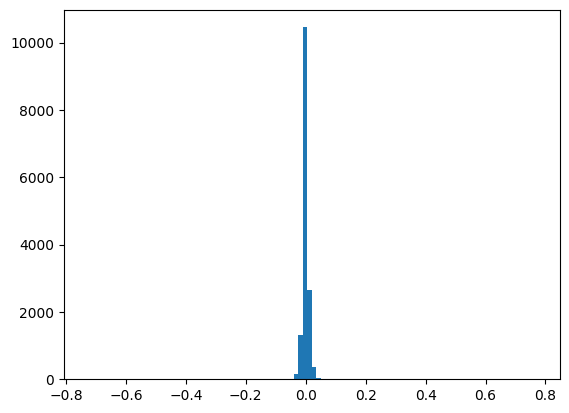

In [96]:
plt.hist(np.array(result)[:, 2], bins= 100)

(array([ 456.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           6.,  491.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    6.,  649.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   12.,  870.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   34., 1469.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  478.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 1626.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  888.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  647.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  535.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         440.]),
 array([-4.40292002e-03, -4.31483756e-03, -4.22675511e-03, -4.13867266e-03,
        -4.05059021e-03, -3.96250776e-03, -3.87442531e-03, -3.78634285e-03,
        -3.69826040e-03, -3.61017795e-03, -3.52209

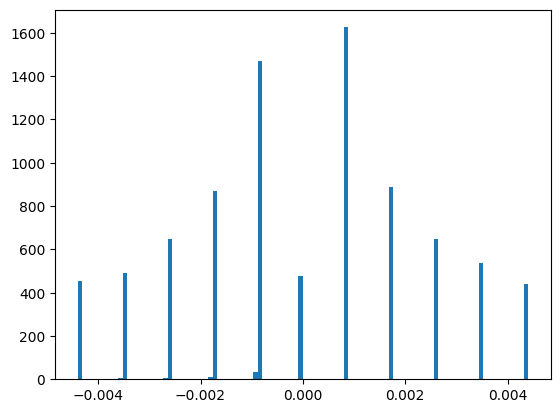

In [110]:
plt.hist([num for num in np.array(result)[:, 2] if -0.005 <= num <= 0.005], bins=100)